In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
path="HomeworkData/"
data = np.loadtxt(path+'spambase.data',delimiter=",")

In [3]:
X_raw = data[:,:-1]
#X_scaled = 100*MinMaxScaler().fit_transform(X_raw[:,-3:])
#X = np.concatenate((X_raw[:,:-4],X_scaled),axis=1)
y = (data[:,-1].astype(np.uint8))

X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=1000, random_state=5)

In [4]:
model = GaussianNB(priors=np.array([0.606,0.394]))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:,1]

In [5]:
acc = accuracy_score(y_test, y_pred)

TN,FP,FN,TP = confusion_matrix(y_test, y_pred).ravel()
TPR=TP/(TP+FN)
FPR=FP/(FP+TN)
TNR=TN/(TN+FP)
FNR=FN/(FN+TP)

fpr, tpr, th = roc_curve(y_test, y_score)
AUC = roc_auc_score(y_test, y_score)

accuracy: 0.821
TPR: 0.9627659574468085
FPR: 0.2644230769230769
TNR: 0.7355769230769231
FNR: 0.03723404255319149
AUC: 0.9464462288597927


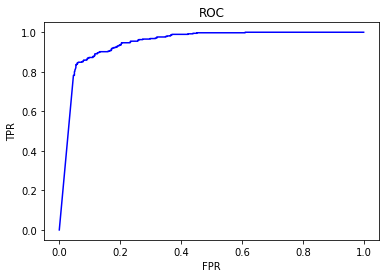

In [6]:
print("accuracy:",acc)
print("TPR:",TPR)
print("FPR:",FPR)
print("TNR:",TNR)
print("FNR:",FNR)
print("AUC:",AUC)

plt.title('ROC')
plt.plot(fpr,tpr,'b')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [7]:
confusion_matrix(y_test, y_pred)

array([[459, 165],
       [ 14, 362]])